In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [3]:
import datetime as dt

 ## Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

##  Exploratory Climate Analysis

In [10]:
#Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [11]:
# Get the last date of entry
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Get the date 365 days from the last date.
first_date = dt.date(2018, 7, 4) - dt.timedelta(days=365)

# Retrieve the last 12 months of precipitation data
one_yr_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > first_date).\
                        order_by(Measurement.date).all()

In [12]:
# Load the results into a pandas dataframe.

precipitation_df = pd.DataFrame(one_yr_prcp, columns=['Date', 'Prcp'])

# Change the date to a datetime format.
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format='%Y/%m/%d')

#Reset the index to the 'Date'
precipitation_df.set_index(precipitation_df['Date'], inplace=True)
precipitation_df.head()

,Date,Prcp
Date,,
2017-07-05,2017-07-05,0.0
2017-07-05,2017-07-05,0.0
2017-07-05,2017-07-05,NaN
2017-07-05,2017-07-05,NaN
2017-07-05,2017-07-05,NaN


<IPython.core.display.Javascript object>


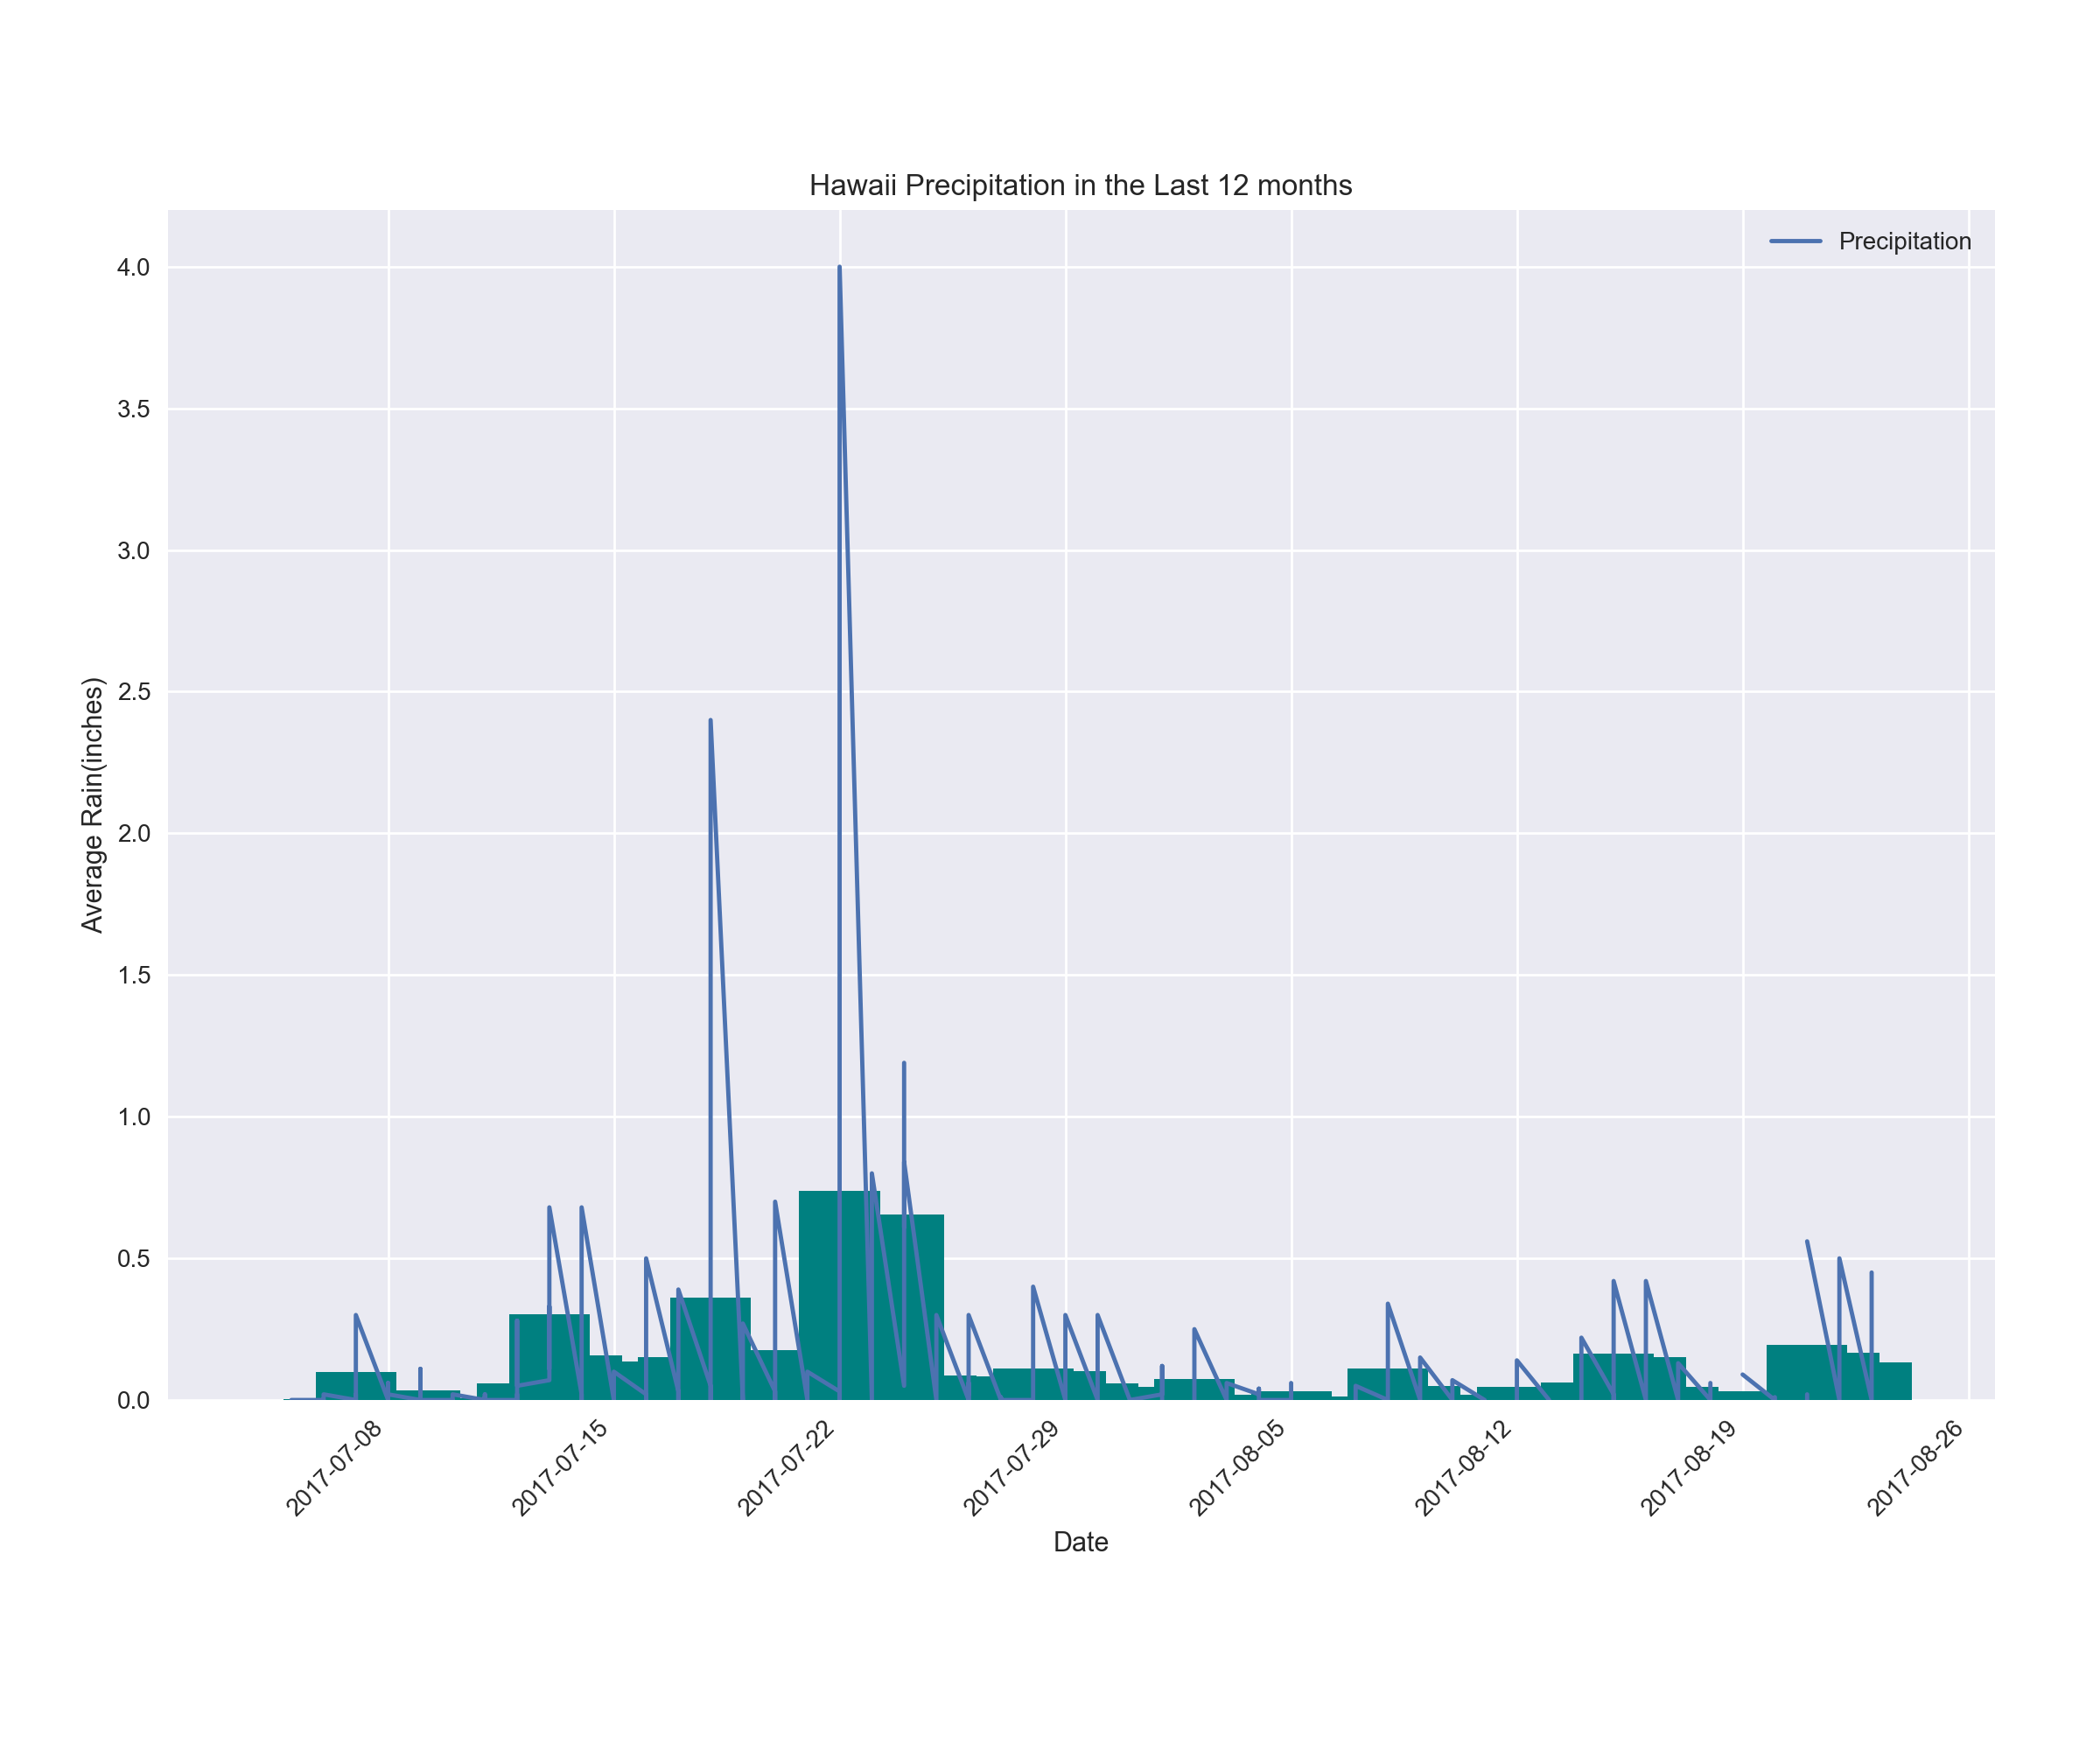

In [13]:
# Plot the dataframe as a horizontal bar chart using pandas plotting

precipitation_df.plot('Date', 'Prcp',figsize=(12,10))
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Precipitation Analysis (7/01/2017 to 8/04/2018)")
plt.legend(["Precipitation"])
plt.xticks(rotation=46)
plt.show()

In [14]:
# Load the results into a pandas dataframe.

precipitation_sum = pd.DataFrame(one_yr_prcp, columns=['Date', 'Prcp'])

#Change the date to a datetime format.
precipitation_sum['Date'] = pd.to_datetime(precipitation_sum['Date'], format='%Y/%m/%d')

#precipitation_df.set_index('Date').head()
# Get the total for each station for each date and set the index as the date.
precipitation_totals = precipitation_sum.pivot_table(precipitation_sum, index=['Date'], aggfunc='mean')
precipitation_totals.head()

,Prcp
Date,
2017-07-05,0.000000
2017-07-06,0.004000
2017-07-07,0.100000
2017-07-08,0.016667
2017-07-09,0.033333


In [15]:
# Plot the dataframe as a horizontal bar chart using pandas plotting

plt.bar(precipitation_totals.index, precipitation_totals["Prcp"], width=2.5, color="teal")
plt.rcParams["figure.figsize"] = [12,6]
plt.xlabel("Date")
plt.ylabel("Average Rain(inches)")
plt.title("Hawaii Precipitation in the Last 12 months")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.show()

In [16]:

# Summary statistics for the percipitation df. 
precipitation_totals.describe()

,Prcp
count,50.000000
mean,0.101686
std,0.146539
min,0.000000
25%,0.016875
50%,0.055000
75%,0.134375
max,0.736667


## Station Analysis

In [20]:
# counts number of stations
station_count = session.query(Station.id).count()  
print(f'There are {station_count} weather stations in Hawaii.')

There are 9 weather stations in Hawaii.


In [21]:
# finds station activity and sorts from most active to least active.
station_activity = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [22]:
station_activity # displays station activity

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [23]:
# displays most active station
station_activity[0]   

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [24]:
for row in reversed(station_activity):                                       # extracts station with most activity
    most_active_station=row.station
    most_active_name=str(row.name)

In [25]:
# finds tobs for most active station
most_active_station_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2017-08-01", Measurement.date <="2018-07-31").all()

In [26]:
# What are the most active stations?
# List the stations and the counts in descending order.
Desc_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
Desc_active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [27]:
Most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
print ( "Station which has the highest number of observations is  " + str(Most_active_stations))

Station which has the highest number of observations is  USC00519281


In [28]:
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2017-08-01', '2018-07-31')).all()
tobs_results

[('USC00519397', 77.0),
 ('USC00519397', 73.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00514830', 74.0),
 ('USC00514830', 80.0),
 ('USC00514830', 81.0),
 ('USC00514830', 81.0),
 ('USC00514830', 82.0),
 ('USC00514830', 81.0),
 ('USC00514830', 78.0),
 ('USC00514830', 81.0),
 ('USC00514830', 81.0),
 ('USC00514830', 81.0),
 ('USC00514830', 81.0),
 ('USC00514830', 81.0),
 ('USC00514830', 82.0),
 ('USC00514830', 82.0),
 ('USC00514830', 78.0),
 ('USC00514830', 77.0),
 ('USC00514830', 80.0),
 ('USC00514830', 80.0),
 ('USC00514830', 79.0),
 ('USC00514830', 82.0),
 ('USC00519523',

In [29]:
Most_active_stations_tobs_results = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2017-08-01', '2018-07-31')).\
                                   filter(Measurement.station == Most_active_stations).all()
Most_active_stations_tobs_results

[('USC00519281', 77.0),
 ('USC00519281', 82.0),
 ('USC00519281', 83.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0)]

In [30]:
Most_active_stations_temp = [result[1] for result in Most_active_stations_tobs_results[0:]]

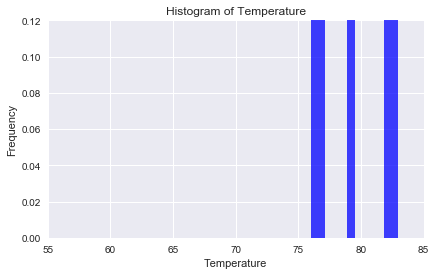

In [43]:
%matplotlib inline  
plt.hist(Most_active_stations_temp, bins = 12, align='mid', label="tobs", alpha=0.75, normed=1,color="b")
plt.title('Last Year Temperature at Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.axis([55, 85, 0, 0.12])
plt.title('Histogram of Temperature')

plt.show()

In [32]:
import warnings
warnings.filterwarnings('ignore')

## Temperature Analysis

In [33]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
Temp=[]
start_date='2017-08-01'
end_date='2018-07-31'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
    #print(str(TMAX))
    #print(str(TMIN))
    #print(str(TAVG))
calc_temps(start_date, end_date)
Temp

[85.0, 70.0, 78.82417582417582]

In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

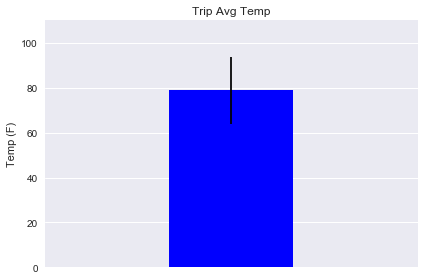

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

%matplotlib inline  
plt.bar( 1,TAVG, color = 'blue', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()


In [36]:
def get_prev_year_date(target):
    """ function get_prev_year_date
        parameters: target (string)
        returns: string
        disassembles string and subtracts 1 from year portion
        returns parameter input on error
    """
    try:
        xl = target.split('-')
        xc = (str(int(xl[0])-1)) + '-' + xl[1] + '-' + xl[2]
        return xc
    except:
        return target

In [37]:
trip_start_date = '2018-08-01'                                               # selected trip start and end dates
trip_end_date = '2018-08-20'

In [38]:

start_conv = get_prev_year_date(trip_start_date)                             # gets previous year start and end dates
end_conv = get_prev_year_date(trip_end_date)

In [39]:
 # calls calc_temps to get plot data
temp_list = calc_temps(start_conv, end_conv)    
temp_list